# <font color="Black"> PROPENSITY MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel("bank.xlsx")

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,0


## <font color="Radium"> Categories into two parts 1)High prob of taking the term deposit, 2)Low prob model

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null int64
dtypes: int64(8), object(9)
memory usage: 600.6+ KB


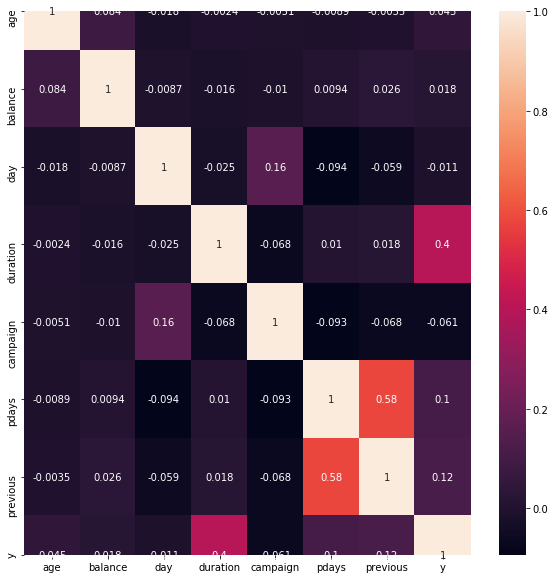

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [6]:
data.groupby("y").mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
1,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


# <font color="red"> With respect housing Loan

In [7]:
data[data["y"]==1]["housing"].value_counts()

no     301
yes    220
Name: housing, dtype: int64

In [8]:
data["housing"].value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

In [9]:
data[data["y"]==1]["housing"].value_counts()[0]/data["housing"].value_counts()[0]

0.11762407190308714

In [10]:
data[data["y"]==1]["housing"].value_counts()[1]/data["housing"].value_counts()[1]

0.11213047910295616

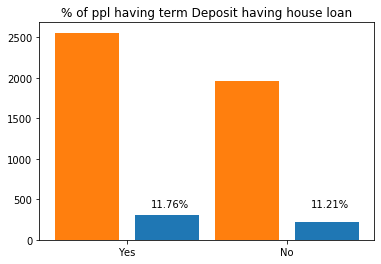

In [11]:
plt.bar(x=[0.5,1.5],height=data[data["y"]==1]["housing"].value_counts(),width=0.4)
plt.bar(x=[0,1],height=data["housing"].value_counts(),width=0.4)
plt.title("% of ppl having term Deposit having house loan")
plt.xticks(ticks=[0.25,1.25],labels=["Yes","No"])
plt.text(x=0.4,y=400,s='11.76%')
plt.text(x=1.4,y=400,s='11.21%')
plt.show()


## <font color="Radium"> *From this we can tell that having Home loan or not does not have any impact on Term Deposit*


# <font color="red"> With respect Loan

In [12]:
data[data["y"]==1]["loan"].value_counts()[0]/data["loan"].value_counts()[0]

0.12480417754569191

In [13]:
data[data["y"]==1]["loan"].value_counts()[1]/data["loan"].value_counts()[1]

0.06222865412445731

In [14]:
data[data["y"]==1]["loan"].value_counts()

no     478
yes     43
Name: loan, dtype: int64

In [15]:
data["loan"].value_counts()

no     3830
yes     691
Name: loan, dtype: int64

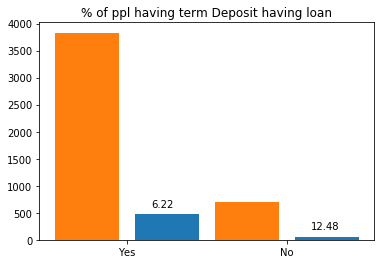

'From this we can tell that a peron NOT having loan have certain impact on Term Deposit and are having more chances of having          Term-Deposits'

In [16]:
plt.bar(x=[0.5,1.5],height=data[data["y"]==1]["loan"].value_counts(),width=0.4)
plt.bar(x=[0,1],height=data["loan"].value_counts(),width=0.4)
plt.title("% of ppl having term Deposit having loan")
plt.xticks(ticks=[0.25,1.25],labels=["Yes","No"])
plt.text(x=0.4,y=600,s=6.22)
plt.text(x=1.4,y=200,s=12.48)
plt.show()
'''From this we can tell that a peron NOT having loan have certain impact on Term Deposit and are having more chances of having          Term-Deposits'''

# <font color="red">

# <font color="red"> Based on Contact in each camaign

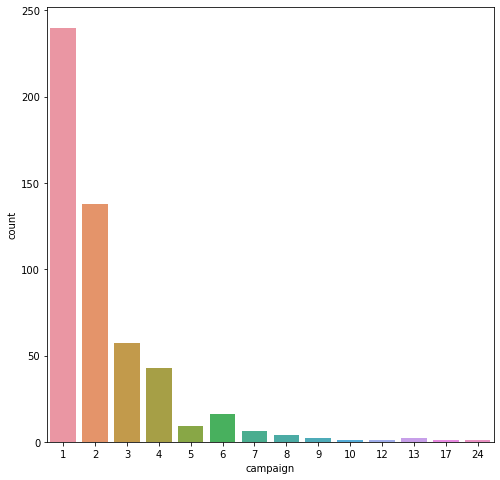

"As the number of contact's increases the term deposit rate decreases"

In [17]:
plt.figure(figsize=(8,8))
sns.countplot(data[data["y"]==1]["campaign"])
plt.show()
'''As the number of contact's increases the term deposit rate decreases'''

# <font color="red"> x is the dataset of customers having term deposit

In [18]:
x=data[data["y"]==1]

''' x is the dataset of customers having term deposit'''
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,1
30,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,1
33,32,management,single,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown,1
34,49,technician,married,tertiary,no,1235,no,no,cellular,13,aug,354,3,-1,0,unknown,1
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,1


# <font color="red"> Month wise analysis

In [19]:
#creating a dataset having month wise customer counts and term deposits
month_count=pd.merge(pd.DataFrame(x["month"].value_counts().reset_index()),pd.DataFrame(data["month"].value_counts().reset_index()),on="index")
month_count

,index,month_x,month_y
0,may,93,1398
1,aug,79,633
2,jul,61,706
3,apr,56,293
4,jun,55,531
5,nov,39,389
6,feb,38,222
7,oct,37,80
8,mar,21,49
9,sep,17,52


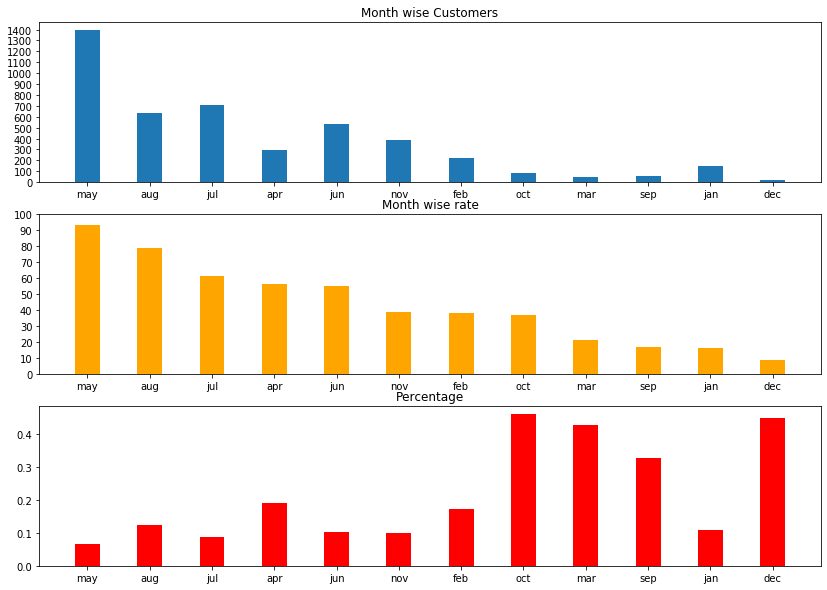

"From this we can get an insight that the term deposit's are higher in may month but the percentage is good in October, March,   September and December But the sale term deposit is actually high and moderetly good in the month of April "

In [20]:
plt.figure(figsize=(14,10))
plt.subplot(3,1,1)
plt.bar(x=month_count["index"],height=month_count["month_y"],width=0.4,label="Total Customers")
plt.yticks(np.arange(0,1500,100))
plt.title("Month wise Customers")



plt.subplot(3,1,2)
plt.bar(x=month_count["index"],height=month_count["month_x"],width=0.4,label="Total number of Term Deposit",color="orange")
#plt.xticks(ticks=np.arange(0,12)+0.2,labels=data["month"].value_counts().index)
plt.title("Month wise rate")
plt.yticks(np.arange(0,110,10))


plt.subplot(3,1,3)
plt.bar(x=month_count["index"],height=month_count["month_x"]/month_count["month_y"],width=0.4,label="Total number of Term Deposit",color="red")
plt.title("Percentage")

plt.show()
'''From this we can get an insight that the term deposit's are higher in may month but the percentage is good in October, March,   September and December But the sale term deposit is actually high and moderetly good in the month of April '''

# <font color="red"> Based on Education

In [21]:
data["education"].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [22]:
x["education"].value_counts()

secondary    245
tertiary     193
primary       64
unknown       19
Name: education, dtype: int64

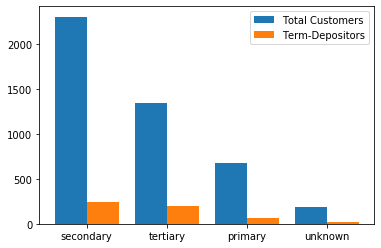

In [23]:
plt.bar(x=np.arange(0,4),height=data["education"].value_counts(),width=0.4,label="Total Customers")
plt.bar(x=np.arange(0,4)+0.4,height=x["education"].value_counts(),width=0.4,label="Term-Depositors")
plt.xticks(ticks=np.arange(0,4)+0.2,labels=data["education"].value_counts().index)
plt.legend()
plt.show()

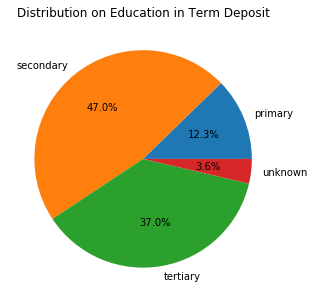

'From this graph we can say that in the given data Secondary and Tertiary Education Holders make 84% of the Term Depoit'

In [24]:
plt.figure(figsize=(5,5))
plt.pie(x.groupby("education")["y"].count(),autopct="%1.1f%%",labels=x.groupby("education")["y"].count().index)

plt.title("Distribution on Education in Term Deposit")
plt.show()
'''From this graph we can say that in the given data Secondary and Tertiary Education Holders make 84% of the Term Depoit'''

In [25]:
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0


# <font color="red"> Based on Job

In [26]:
data["job"].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [27]:
pd.DataFrame(x["job"].value_counts())

,job
management,131
technician,83
blue-collar,69
admin.,58
retired,54
services,38
self-employed,20
student,19
entrepreneur,15
housemaid,14


In [28]:
job_count=pd.merge(pd.DataFrame(data["job"].value_counts().reset_index()),pd.DataFrame(x["job"].value_counts().reset_index()),on="index")
job_count

,index,job_x,job_y
0,management,969,131
1,blue-collar,946,69
2,technician,768,83
3,admin.,478,58
4,services,417,38
5,retired,230,54
6,self-employed,183,20
7,entrepreneur,168,15
8,unemployed,128,13
9,housemaid,112,14


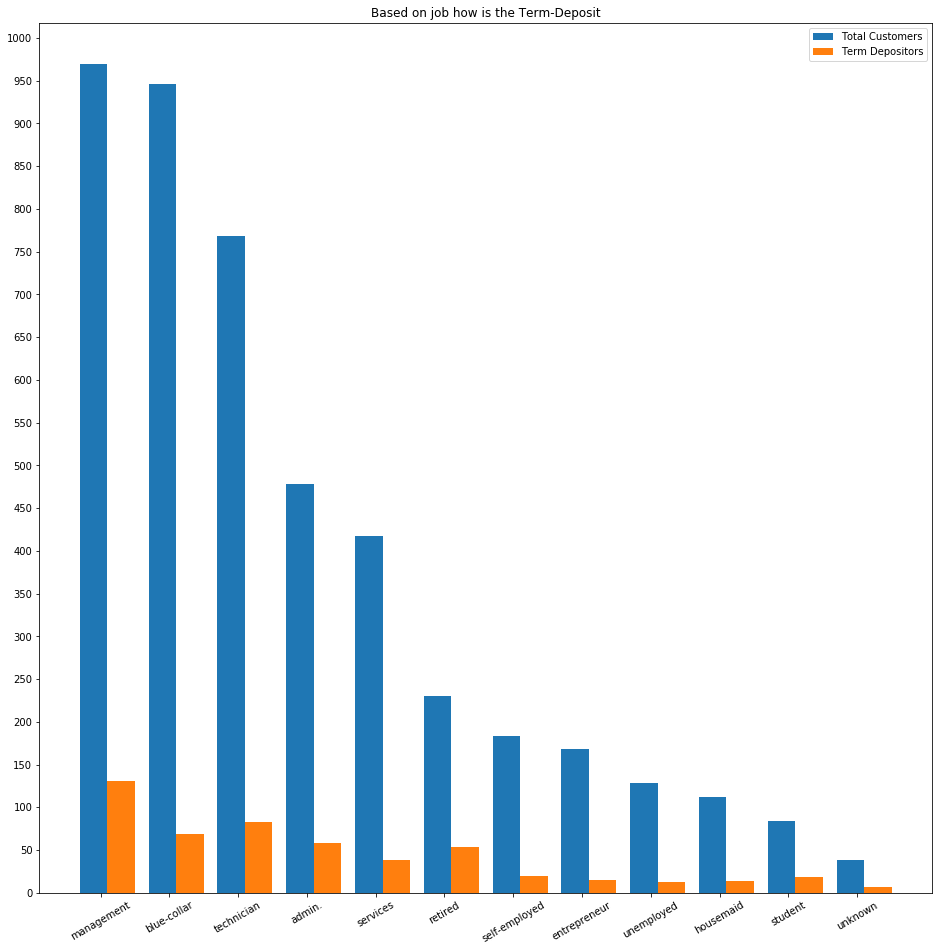

In [29]:
plt.figure(figsize=(16,16))
plt.bar(x=np.arange(0,24,2),height=job_count["job_x"],width=0.8,label="Total Customers")
plt.bar(x=np.arange(0,24,2)+0.8,height=job_count["job_y"],width=0.8,label="Term Depositors")
plt.xticks(ticks=np.arange(0,24,2)+0.2,labels=job_count["index"],rotation=30)
plt.yticks(ticks=np.arange(0,1050,50))
plt.legend()
plt.title("Based on job how is the Term-Deposit")
plt.show()


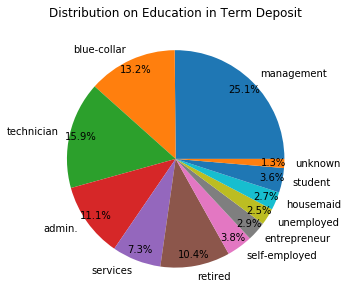

'From this graph we can say that in the given data peopple working in Management sector make 25.1 of the Term Depoits,and      around 58% is done by people working in sectors Blue-collar, Technician, Admin, Services and Retired Persons'

In [30]:
plt.figure(figsize=(5,5))
plt.pie(x=job_count["job_y"],autopct="%1.1f%%",labels=job_count["index"],pctdistance=0.9)

plt.title("Distribution on Education in Term Deposit")
plt.show()
'''From this graph we can say that in the given data peopple working in Management sector make 25.1 of the Term Depoits,and      around 58% is done by people working in sectors Blue-collar, Technician, Admin, Services and Retired Persons'''

# <font color="red"> Based on AGE

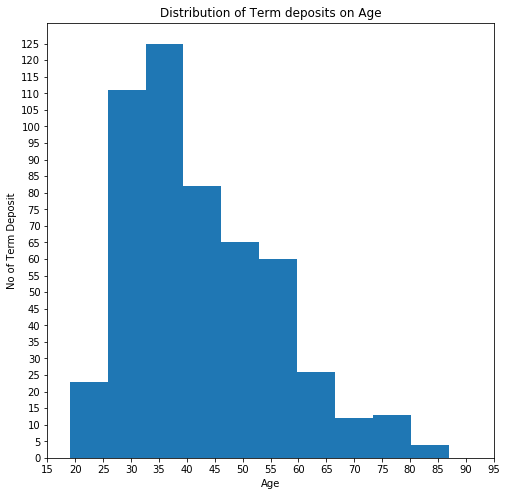

'From this Graph we can tell that many Term-depoits are done by the people in the age of 25-55, and in specific 28-45 have most Term Deposits '

In [31]:
plt.figure(figsize=(8,8))
plt.hist(x["age"])
plt.xticks(ticks=np.arange(15,100,5))
plt.yticks(ticks=np.arange(0,130,5))
plt.xlabel("Age")
plt.ylabel("No of Term Deposit")
plt.title("Distribution of Term deposits on Age")
plt.show()
"""From this Graph we can tell that many Term-depoits are done by the people in the age of 25-55, and in specific 28-45 have most Term Deposits """

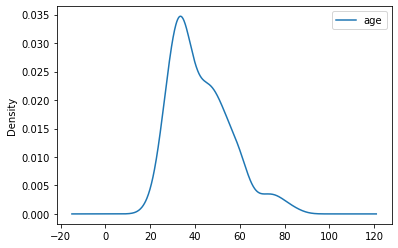

'The above can also be shown through Kernel Density Plot'

In [32]:
pd.DataFrame(x.age).plot.kde()
plt.show()
'''The above can also be shown through Kernel Density Plot'''

# <font color="red"> Based on Marital

In [33]:
data["marital"].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [34]:
x["marital"].value_counts()

married     277
single      167
divorced     77
Name: marital, dtype: int64

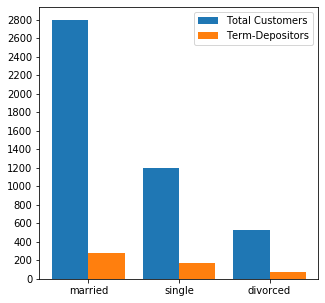

In [35]:
plt.figure(figsize=(5,5))
plt.bar(x=np.arange(0,3),height=data["marital"].value_counts(),width=0.4,label="Total Customers")
plt.bar(x=np.arange(0,3)+0.4,height=x["marital"].value_counts(),width=0.4,label="Term-Depositors")
plt.xticks(ticks=np.arange(0,3)+0.2,labels=data["marital"].value_counts().index)
plt.yticks(np.arange(0,3000,200))
plt.legend()
plt.show()

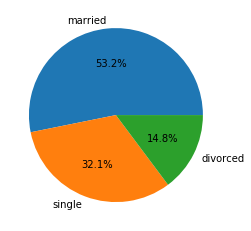

'Around 53.2% Term-Depositors are Married'

In [36]:
plt.pie(x["marital"].value_counts(),autopct="%1.1f%%",labels=x["marital"].value_counts().index)
plt.show()
'''Around 53.2% Term-Depositors are Married'''

# <font color="red"> Based on previous Outcome

In [37]:
x["poutcome"].value_counts()

unknown    337
success     83
failure     63
other       38
Name: poutcome, dtype: int64

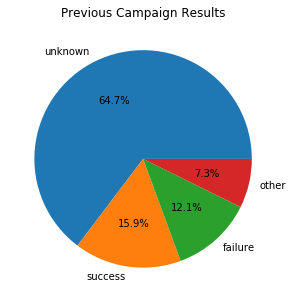

'15.9% is the previous campaign Sucess Rate it should be increased when its done once again'

In [38]:
plt.figure(figsize=(5,5))
plt.pie(x["poutcome"].value_counts(),autopct="%1.1f%%",labels=x["poutcome"].value_counts().index)
plt.title("Previous Campaign Results")
plt.show()
'''15.9% is the previous campaign Sucess Rate it should be increased when its done once again'''

# <font color="Purple"> More Analysis

# <font color="red"> Based on Job and Maritial Status

In [40]:
(x.groupby(["job","marital"])["y"].count())

job            marital 
admin.         divorced    11
               married     31
               single      16
blue-collar    divorced    10
               married     35
               single      24
entrepreneur   divorced     3
               married      9
               single       3
housemaid      divorced     4
               married      7
               single       3
management     divorced    12
               married     77
               single      42
retired        divorced    16
               married     36
               single       2
self-employed  divorced     5
               married      8
               single       7
services       divorced     8
               married     16
               single      14
student        married      1
               single      18
technician     divorced     8
               married     42
               single      33
unemployed     married      9
               single       4
unknown        married      6
               s

In [41]:
data.groupby(["job","marital"])["y"].count()

job            marital 
admin.         divorced     69
               married     266
               single      143
blue-collar    divorced     79
               married     693
               single      174
entrepreneur   divorced     16
               married     132
               single       20
housemaid      divorced     13
               married      84
               single       15
management     divorced    119
               married     557
               single      293
retired        divorced     43
               married     176
               single       11
self-employed  divorced     15
               married     127
               single       41
services       divorced     62
               married     236
               single      119
student        married      10
               single       74
technician     divorced     89
               married     411
               single      268
unemployed     divorced     22
               married      75
               

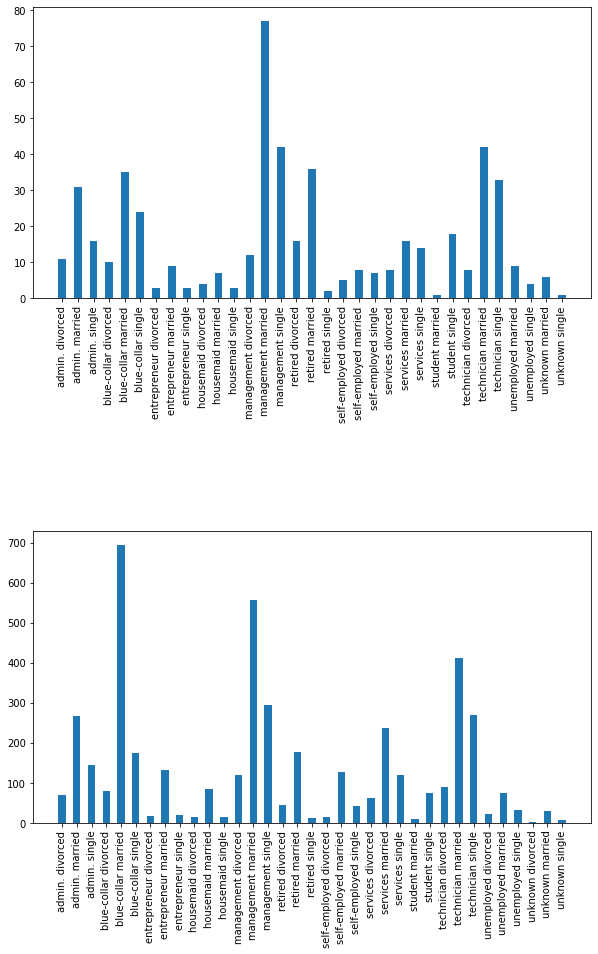

In [42]:
x_l=x.groupby(["job","marital"])["y"].count().index
names=[]
for i in range(0,len(x_l)):
    names.append(x_l[i][0]+" "+x_l[i][1])
d_l=data.groupby(["job","marital"])["y"].count().index
names1=[]
for i in range(0,len(d_l)):
    names1.append(d_l[i][0]+" "+d_l[i][1])
    
plt.figure(figsize=(10,15))
x_l=x.groupby(["job","marital"])["y"].count().index
h1=x.groupby(["job","marital"])["y"].count().values
h2=data.groupby(["job","marital"])["y"].count()

plt.subplot(2,1,1)
plt.subplots_adjust(hspace=0.8)
plt.bar(x=names,height=h1,width=0.5)
plt.xticks(ticks=names,rotation=90)

plt.subplot(2,1,2)

plt.bar(x=names1,height=h2,width=0.5)
plt.xticks(ticks=names1,rotation=90)

plt.show()

In [43]:
job_marital_ratio=pd.DataFrame(x.groupby(["job","marital"])["y"].count())/pd.DataFrame(data.groupby(["job","marital"])["y"].count())
print(job_marital_ratio[job_marital_ratio["y"]>0.19])
'''From This we can tell that if a person is fallinng under these circumstance he is having more chances of getting Term-deposit'''

                               y
job           marital           
housemaid     divorced  0.307692
              single    0.200000
retired       divorced  0.372093
              married   0.204545
self-employed divorced  0.333333
student       single    0.243243
unknown       married   0.200000


'From This we can tell that if a person is fallinng under these circumstance he is having more chances of getting Term-deposit'

# <font color="red"> Based on Job and Education

In [44]:
x_l=x.groupby(["job","education"])["y"].count()
x_l

job            education
admin.         primary        1
               secondary     48
               tertiary       7
               unknown        2
blue-collar    primary       16
               secondary     49
               tertiary       1
               unknown        3
entrepreneur   primary        3
               secondary      7
               tertiary       4
               unknown        1
housemaid      primary        8
               secondary      3
               tertiary       3
management     primary        5
               secondary      9
               tertiary     113
               unknown        4
retired        primary       16
               secondary     22
               tertiary      13
               unknown        3
self-employed  primary        2
               secondary      2
               tertiary      15
               unknown        1
services       primary        3
               secondary     32
               tertiary       2
               

In [45]:
d_l=data.groupby(["job","education"])["y"].count()
d_l

job            education
admin.         primary       17
               secondary    393
               tertiary      51
               unknown       17
blue-collar    primary      369
               secondary    524
               tertiary      12
               unknown       41
entrepreneur   primary       26
               secondary     58
               tertiary      73
               unknown       11
housemaid      primary       57
               secondary     28
               tertiary      22
               unknown        5
management     primary       39
               secondary    116
               tertiary     787
               unknown       27
retired        primary       80
               secondary    105
               tertiary      31
               unknown       14
self-employed  primary       15
               secondary     76
               tertiary      88
               unknown        4
services       primary       25
               secondary    363
               

In [46]:
j=job_education=pd.DataFrame(x.groupby(["job","education"])["y"].count())/pd.DataFrame(data.groupby(["job","education"])["y"].count())
print(job_education[job_education["y"]>0.19])
'''From this we can tell that a retiered person having a tertiary level of education have 41.9% chance of having a Term-Deposit '''

                                y
job           education          
retired       primary    0.200000
              secondary  0.209524
              tertiary   0.419355
              unknown    0.214286
self-employed unknown    0.250000
student       primary    1.000000
              secondary  0.212766
              tertiary   0.368421
technician    primary    0.200000
unknown       primary    0.285714
              unknown    0.200000


'From this we can tell that a retiered person having a tertiary level of education have 41.9% chance of having a Term-Deposit '

# <font color="blue"> Data Preparation for model building

In [47]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,0.045092
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196,0.017905
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114,-0.011244
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080,0.401118
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833,-0.061147
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562,0.104087
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000,0.116714
y,0.045092,0.017905,-0.011244,0.401118,-0.061147,0.104087,0.116714,1.000000


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null int64
dtypes: int64(8), object(9)
memory usage: 600.6+ KB


In [49]:
print(data.isnull().sum())
'''No null values'''

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


'No null values'

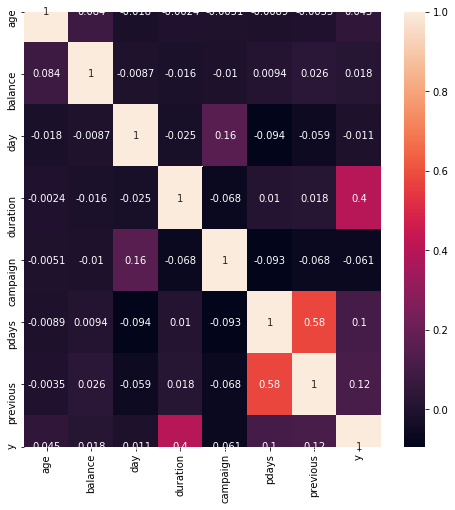

'No Co-related Columns'

In [50]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)
plt.show()
'''No Co-related Columns'''

In [51]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [52]:
data.select_dtypes(["int64","float64"]).head()

,age,balance,day,duration,campaign,pdays,previous,y
0,30,1787,19,79,1,-1,0,0
1,33,4789,11,220,1,339,4,0
2,35,1350,16,185,1,330,1,0
3,30,1476,3,199,4,-1,0,0
4,59,0,5,226,1,-1,0,0


In [53]:
df1=data[['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month']]
df1.head()

,job,marital,education,default,housing,loan,contact,month
0,unemployed,married,primary,no,no,no,cellular,oct
1,services,married,secondary,no,yes,yes,cellular,may
2,management,single,tertiary,no,yes,no,cellular,apr
3,management,married,tertiary,no,yes,yes,unknown,jun
4,blue-collar,married,secondary,no,yes,no,unknown,may


In [54]:
onehotencoder = OneHotEncoder() 
df2 = onehotencoder.fit_transform(df1).toarray() 
df2

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [55]:
df3=pd.DataFrame(df2)
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [56]:
df_numerical=data._get_numeric_data()

In [57]:
df_numerical.drop(["y","previous","pdays"],axis=1,inplace=True)

In [58]:
df_numerical

,age,balance,day,duration,campaign
0,30,1787,19,79,1
1,33,4789,11,220,1
2,35,1350,16,185,1
3,30,1476,3,199,4
4,59,0,5,226,1
...,...,...,...,...,...
4516,33,-333,30,329,5
4517,57,-3313,9,153,1
4518,57,295,19,151,11
4519,28,1137,6,129,4


In [59]:
x=pd.concat((df_numerical,df3),axis=1)
x.head()

,age,balance,day,duration,campaign,0,1,2,3,4,...,30,31,32,33,34,35,36,37,38,39
0,30,1787,19,79,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,33,4789,11,220,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35,1350,16,185,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,1476,3,199,4,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,59,0,5,226,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [60]:
y=pd.DataFrame(data.y)

In [61]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
std=StandardScaler()

In [64]:
x=std.fit_transform(x)

In [65]:
x=pd.DataFrame(x)

In [66]:
y=data.y
y=pd.DataFrame(y)
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [67]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error
import math

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [69]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error
import math

        
def RandomForest(x_train,y_train,x_test,y_test):
    #compared to "Decission Tree model, accuracy go up by 5%"
    from sklearn.ensemble import RandomForestClassifier
    rf=RandomForestClassifier(n_estimators=100,random_state=0)
    # n_estimators indicates the number of trees in the forst
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    print("Random Forest accuracy_score",accuracy_score(y_test,y_pred)*100)
    RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
    print("RMSE: ",RMSE)
    
    
def XGBoost(x_train,y_train,x_test,y_test):
    from xgboost import XGBClassifier
    xgb=XGBClassifier()
    xgb.fit(x_train,y_train)
    y_pred=xgb.predict(x_test)
    RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
    print("XGBoost accuracy_score",accuracy_score(y_test,y_pred)*100)
    print("RMSE: ",RMSE)

    
def Call(x_train,y_train,x_test,y_test):
    RandomForest(x_train,y_train,x_test,y_test)
    XGBoost(x_train,y_train,x_test,y_test)
    

In [70]:
Call(x_train,y_train,x_test,y_test)

C:\Users\ulleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Random Forest accuracy_score 89.31466470154753
RMSE:  0.3268843113159833


C:\Users\ulleg\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ulleg\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBoost accuracy_score 89.31466470154753
RMSE:  0.3268843113159833


# <font color="Red"> The Accuracy and RMSE for Random Forest and  XGBoost Regressor are better